In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
with pd.HDFStore("data/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [3]:
df.shape

(1710756, 111)

In [4]:
df.head()

,id,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,...,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
0,10,0,0.370326,-0.006316,0.222831,-0.213030,0.729277,-0.335633,0.113292,1.621238,...,0.775208,NaN,NaN,NaN,-0.414776,NaN,NaN,-2.0,NaN,-0.011753
1,11,0,0.014765,-0.038064,-0.017425,0.320652,-0.034134,0.004413,0.114285,-0.210185,...,0.025590,NaN,NaN,NaN,-0.273607,NaN,NaN,-2.0,NaN,-0.001240
2,12,0,-0.010622,-0.050577,3.379575,-0.157525,-0.068550,-0.155937,1.219439,-0.764516,...,0.151881,NaN,NaN,NaN,-0.175710,NaN,NaN,-2.0,NaN,-0.020940
3,25,0,NaN,NaN,NaN,NaN,NaN,0.178495,NaN,-0.007262,...,1.035936,NaN,NaN,NaN,-0.211506,NaN,NaN,-2.0,NaN,-0.015959
4,26,0,0.176693,-0.025284,-0.057680,0.015100,0.180894,0.139445,-0.125687,-0.018707,...,0.630232,NaN,NaN,NaN,-0.001957,NaN,NaN,0.0,NaN,-0.007338


In [5]:
len(df['id'].unique())

1424

In [6]:
len(df['timestamp'].unique())

1813

In [13]:
missing_ratio = df.isnull().sum()/df.shape[0]

In [14]:
missing_ratio.index

Index(['id', 'timestamp', 'derived_0', 'derived_1', 'derived_2', 'derived_3',
       'derived_4', 'fundamental_0', 'fundamental_1', 'fundamental_2',
       ...
       'technical_36', 'technical_37', 'technical_38', 'technical_39',
       'technical_40', 'technical_41', 'technical_42', 'technical_43',
       'technical_44', 'y'],
      dtype='object', length=111)

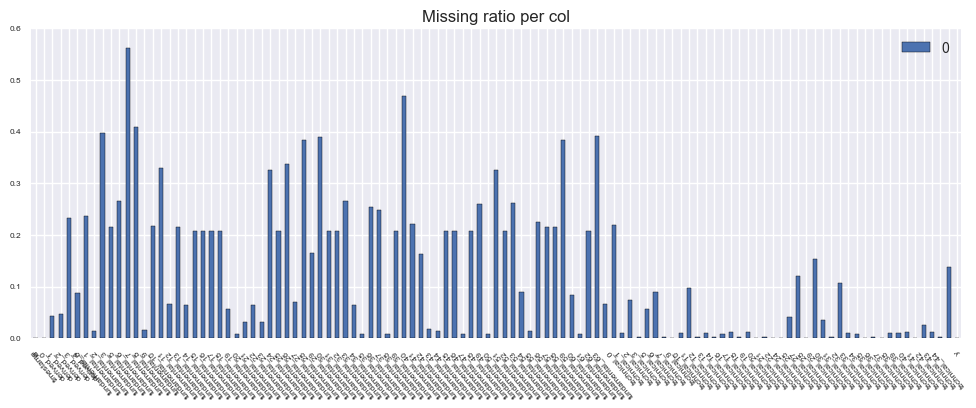

In [49]:
pd.DataFrame(missing_ratio).plot(kind = 'bar',rot = 130,figsize = (12,4),fontsize = 6,title = 'Missing ratio per col')

In [63]:
print('col with missing values, ordered by number:')
print(list(pd.DataFrame(missing_ratio).sort(0,ascending=False).index))

col with missing values, ordered by number:
['fundamental_5', 'fundamental_38', 'fundamental_6', 'fundamental_1', 'fundamental_61', 'fundamental_28', 'fundamental_57', 'fundamental_26', 'fundamental_24', 'fundamental_9', 'fundamental_22', 'fundamental_49', 'fundamental_31', 'fundamental_3', 'fundamental_51', 'fundamental_47', 'fundamental_34', 'fundamental_35', 'derived_4', 'derived_2', 'fundamental_54', 'fundamental_39', 'fundamental_63', 'fundamental_8', 'fundamental_56', 'fundamental_55', 'fundamental_11', 'fundamental_2', 'fundamental_23', 'fundamental_14', 'fundamental_37', 'fundamental_46', 'fundamental_44', 'fundamental_50', 'fundamental_13', 'fundamental_16', 'fundamental_60', 'fundamental_30', 'fundamental_15', 'fundamental_43', 'fundamental_29', 'fundamental_27', 'fundamental_40', 'technical_28', 'technical_44', 'technical_25', 'technical_31', 'technical_10', 'fundamental_52', 'technical_5', 'derived_3', 'fundamental_58', 'technical_1', 'fundamental_25', 'fundamental_62', 'fu

C:\Users\Miya\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [24]:
df_byid = df.groupby(['id']).count()

In [36]:
df_byid.head()

,timestamp,derived_0,derived_1,derived_2,derived_3,derived_4,fundamental_0,fundamental_1,fundamental_2,fundamental_3,fundamental_5,fundamental_6,fundamental_7,fundamental_8,fundamental_9,fundamental_10,fundamental_11,fundamental_12,fundamental_13,fundamental_14,fundamental_15,fundamental_16,fundamental_17,fundamental_18,fundamental_19,fundamental_20,fundamental_21,fundamental_22,fundamental_23,fundamental_24,fundamental_25,fundamental_26,fundamental_27,fundamental_28,fundamental_29,fundamental_30,fundamental_31,fundamental_32,fundamental_33,fundamental_34,fundamental_35,fundamental_36,fundamental_37,fundamental_38,fundamental_39,fundamental_40,fundamental_41,fundamental_42,fundamental_43,fundamental_44,fundamental_45,fundamental_46,fundamental_47,fundamental_48,fundamental_49,fundamental_50,fundamental_51,fundamental_52,fundamental_53,fundamental_54,fundamental_55,fundamental_56,fundamental_57,fundamental_58,fundamental_59,fundamental_60,fundamental_61,fundamental_62,fundamental_63,technical_0,technical_1,technical_2,technical_3,technical_5,technical_6,technical_7,technical_9,technical_10,technical_11,technical_12,technical_13,technical_14,technical_16,technical_17,technical_18,technical_19,technical_20,technical_21,technical_22,technical_24,technical_25,technical_27,technical_28,technical_29,technical_30,technical_31,technical_32,technical_33,technical_34,technical_35,technical_36,technical_37,technical_38,technical_39,technical_40,technical_41,technical_42,technical_43,technical_44,y
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1646,1643,1643,1643,1643,1643,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1643,1523,1643,708,1643,1543,1643,1565,1524,1643,1643,1643,1643,1643,1643,1638,1643,1643,1643,1643,1643,1638,1643,1646,1583,1485,1643,1444,1643,1638,1505,1643,1627,1646,1643,1643,1643,1643,1643,1643,1604,1643,1643,1464,1646
6,728,724,724,724,724,724,724,0,724,724,0,0,724,724,724,0,724,724,724,724,724,724,724,724,724,724,0,724,724,724,724,0,724,724,724,724,724,724,724,724,724,724,724,0,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,724,0,724,724,724,0,0,724,724,627,724,649,606,724,724,724,724,724,724,721,724,724,724,724,724,721,724,728,669,564,724,524,724,721,585,724,708,728,724,724,724,724,724,724,689,724,724,544,728
7,1543,1540,1540,1540,1540,1540,1540,1540,1540,1490,0,1540,1540,1540,1540,0,1540,1540,1540,1540,1540,1540,929,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1490,1540,1540,1490,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,1540,0,0,1540,1444,1540,1464,1424,1540,1540,1540,1540,1540,1540,1536,1540,1540,1540,1540,1540,1536,1540,1543,1485,1382,1540,1341,1540,1536,1401,1540,1524,1543,1540,1540,1540,1540,1540,1540,1505,1540,1540,1361,1543
10,116,116,116,116,116,116,116,116,116,116,0,116,116,116,116,79,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,63,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,116,79,116,95,33,116,54,14,116,116,95,116,116,95,116,116,95,116,95,116,116,116,116,73,0,116,0,116,116,0,95,114,116,116,116,95,95,95,116,92,95,116,0,116
11,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,0,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,0,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1813,1792,1730,1813,1751,1711,1813,1813,1792,1813,1813,1792,1813,1813,1792,1813,1792,1813,1813,1813,1813,1770,16

In [61]:
df_byid.index

Int64Index([   0,    6,    7,   10,   11,   12,   13,   14,   15,   16,
            ...
            2146, 2148, 2149, 2150, 2151, 2152, 2154, 2155, 2156, 2158],
           dtype='int64', name='id', length=1424)

In [62]:
max_row = []
for i in df_byid.index:
    max_r = df_byid.loc[i].values.max()
    max_row.append(max_r)

In [64]:
min_row = []
for i in df_byid.index:
    min_r = df_byid.loc[i].values.min()
    min_row.append(min_r)

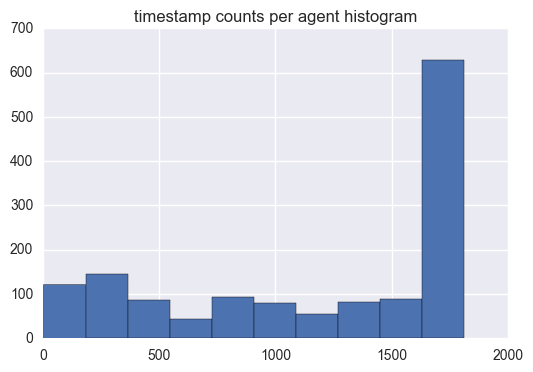

In [66]:
plt.hist(max_row)
plt.title('timestamp counts per agent histogram')

In [67]:
missing = []
for i,j in zip(max_row, min_row):
    missing.append(i-j)

In [68]:
missing

[938,
 728,
 1543,
 116,
 1813,
 1813,
 1543,
 218,
 1340,
 204,
 779,
 218,
 829,
 1646,
 202,
 218,
 932,
 1813,
 1813,
 159,
 932,
 1813,
 218,
 422,
 391,
 1813,
 1394,
 1003,
 1813,
 1813,
 932,
 1442,
 1745,
 1711,
 1395,
 1813,
 1543,
 320,
 285,
 1813,
 1813,
 62,
 253,
 201,
 1442,
 1745,
 1813,
 1273,
 185,
 167,
 1813,
 986,
 1813,
 1813,
 932,
 1813,
 1813,
 1338,
 185,
 369,
 1035,
 377,
 25,
 1813,
 1543,
 1813,
 422,
 996,
 470,
 176,
 52,
 252,
 99,
 1543,
 320,
 49,
 1386,
 1813,
 1527,
 1813,
 872,
 185,
 320,
 185,
 1524,
 218,
 1813,
 683,
 1813,
 141,
 1813,
 1442,
 218,
 320,
 1813,
 1539,
 1813,
 1442,
 728,
 1136,
 1813,
 1813,
 1813,
 167,
 829,
 185,
 357,
 523,
 404,
 99,
 728,
 1003,
 1813,
 14,
 422,
 1813,
 1813,
 1340,
 1341,
 1527,
 320,
 320,
 185,
 1340,
 1813,
 1813,
 1175,
 1813,
 1813,
 1349,
 185,
 1813,
 984,
 1813,
 1136,
 1136,
 136,
 1813,
 1813,
 1813,
 1646,
 1813,
 218,
 204,
 218,
 1813,
 1813,
 765,
 19,
 523,
 1632,
 883,
 1813,
 1745,
 1

In [69]:
min_row

[708,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1541,
 0,
 0,
 0,
 0,
 1240,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1422,
 0,
 419,
 810,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17,
 0,
 0,
 0,
 0,
 891,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 755,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1541,
 0,
 0,
 0,
 1048,
 0,
 0,
 181,
 0,
 0,
 0,
 1628,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 504,
 0,
 0,
 0,
 0,
 1183,
 0,
 0,
 1628,
 826,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 729,
 0,
 0,
 0,
 0,
 0,
 1628,
 0,
 0,
 351,
 117,
 0,
 0,
 0,
 0,
 0,
 720,
 0,
 0,
 0,
 0,
 1341,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 283,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1628,
 1628,
 16